1. Nonlinear Regression

Scenario:
A pharmaceutical company is testing the effectiveness of a new drug on reducing blood pressure. The response (reduction in blood pressure) is expected to follow a sigmoidal (S-shaped) dose-response curve as the drug dosage increases.

Synthetic Data Generation:

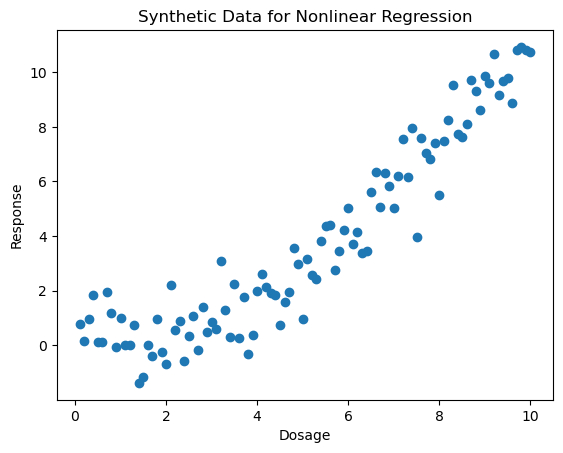

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic data for nonlinear regression
np.random.seed(42)
dosage = np.linspace(0.1, 10, 100)
true_params = [15, 0.5, 8]  # Parameters for the sigmoid function: [max effect, steepness, midpoint]
noise = np.random.normal(0, 1, len(dosage))

def sigmoid(x, max_effect, steepness, midpoint):
    return max_effect / (1 + np.exp(-steepness * (x - midpoint)))

response = sigmoid(dosage, *true_params) + noise

data_nonlinear = pd.DataFrame({'Dosage': dosage, 'Response': response})

# Plot the data
plt.scatter(data_nonlinear['Dosage'], data_nonlinear['Response'])
plt.xlabel('Dosage')
plt.ylabel('Response')
plt.title('Synthetic Data for Nonlinear Regression')
plt.show()

2. Analyzing Nested or Clustered Data

Scenario:
An educational researcher is studying the impact of different teaching methods on student performance across multiple schools. The data is nested, with students clustered within schools.

Synthetic Data Generation:

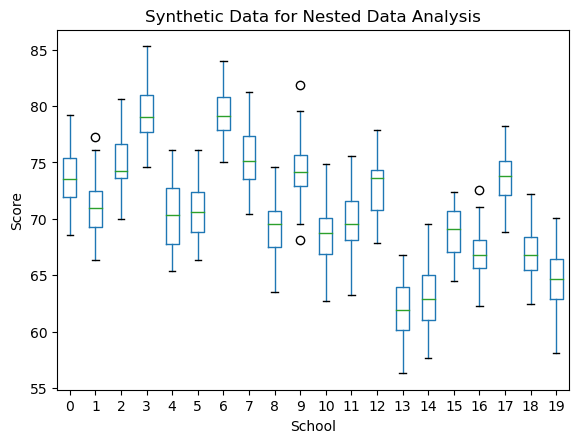

In [4]:
import pandas as pd
import numpy as np

# Generate synthetic data for nested data analysis
np.random.seed(42)
num_schools = 20
students_per_school = 50

school_effects = np.random.normal(0, 5, num_schools)
student_noise = np.random.normal(0, 2, num_schools * students_per_school)

schools = np.repeat(np.arange(num_schools), students_per_school)
teaching_method = np.random.choice(['Traditional', 'Modern'], num_schools * students_per_school)

base_score = 70
student_scores = base_score + school_effects[schools] + student_noise + (teaching_method == 'Modern') * 3

data_nested = pd.DataFrame({
    'School': schools,
    'TeachingMethod': teaching_method,
    'Score': student_scores
})

# Plot the data
data_nested.boxplot(by='School', column='Score', grid=False)
plt.title('Synthetic Data for Nested Data Analysis')
plt.suptitle('')
plt.xlabel('School')
plt.ylabel('Score')
plt.show()

3. Regularization Methods

Scenario:
A marketing analyst is trying to predict sales based on a large number of predictors, including advertising spend across various channels, economic indicators, and seasonal effects. Regularization is needed to handle multicollinearity and prevent overfitting.

Synthetic Data Generation:

In [6]:
import pandas as pd
import numpy as np

# Generate synthetic data for regularization methods
np.random.seed(42)
n_samples = 100
n_features = 20

X = np.random.normal(0, 1, (n_samples, n_features))
true_coeffs = np.random.normal(0, 1, n_features)
true_coeffs[10:] = 0  # Only the first 10 predictors have non-zero coefficients
noise = np.random.normal(0, 1, n_samples)
y = X @ true_coeffs + noise

data_regularization = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(n_features)])
data_regularization['Sales'] = y

# Display the first few rows of the data
print(data_regularization.head())

   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0   0.496714  -0.138264   0.647689   1.523030  -0.234153  -0.234137   
1   1.465649  -0.225776   0.067528  -1.424748  -0.544383   0.110923   
2   0.738467   0.171368  -0.115648  -0.301104  -1.478522  -0.719844   
3  -0.479174  -0.185659  -1.106335  -1.196207   0.812526   1.356240   
4  -0.219672   0.357113   1.477894  -0.518270  -0.808494  -0.501757   

   Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_11  Feature_12  \
0   1.579213   0.767435  -0.469474   0.542560  ...   -0.465730    0.241962   
1  -1.150994   0.375698  -0.600639  -0.291694  ...    1.852278   -0.013497   
2  -0.460639   1.057122   0.343618  -1.763040  ...   -0.385082   -0.676922   
3  -0.072010   1.003533   0.361636  -0.645120  ...    1.538037   -0.035826   
4   0.915402   0.328751  -0.529760   0.513267  ...    0.968645   -0.702053   

   Feature_13  Feature_14  Feature_15  Feature_16  Feature_17  Feature_18  \
0   -1.913280   -1.724918  

### Complex Data Scenario with Multiple Predictors

- Scenario:
A health researcher is examining the factors affecting patient recovery times after surgery. The data includes multiple predictors such as patient age, gender, type of surgery, hospital, and surgeon. Patients are nested within hospitals, and surgeries are nested within surgeons. The data collection includes both categorical (e.g., gender, type of surgery, hospital) and continuous variables (e.g., age, pre-surgery health metrics).

- Controlling for Random Effects:
To control for random effects, we would use a mixed-effect model. Random effects would account for variations between hospitals and surgeons, while fixed effects would include patient-specific variables like age, gender, and type of surgery.

- Value of Mixed-Effect Models:
Mixed-effect models are valuable for analyzing nested or crossed data structures as they allow for the inclusion of random effects, which account for the correlation within clusters (e.g., patients within the same hospital or surgeries by the same surgeon). This leads to more accurate estimates of fixed effects and better generalizability of the results.

Synthetic Data Generation for Mixed-Effect Models:

In [7]:
import pandas as pd
import numpy as np

# Generate synthetic data for mixed-effect models
np.random.seed(42)
num_hospitals = 10
surgeons_per_hospital = 5
patients_per_surgeon = 20

hospitals = np.repeat(np.arange(num_hospitals), surgeons_per_hospital * patients_per_surgeon)
surgeons = np.tile(np.repeat(np.arange(num_hospitals * surgeons_per_hospital), patients_per_surgeon), 1)
ages = np.random.randint(18, 80, size=num_hospitals * surgeons_per_hospital * patients_per_surgeon)
gender = np.random.choice(['Male', 'Female'], num_hospitals * surgeons_per_hospital * patients_per_surgeon)
surgery_type = np.random.choice(['Type A', 'Type B', 'Type C'], num_hospitals * surgeons_per_hospital * patients_per_surgeon)

hospital_effects = np.random.normal(0, 5, num_hospitals)
surgeon_effects = np.random.normal(0, 3, num_hospitals * surgeons_per_hospital)

base_recovery_time = 30
patient_noise = np.random.normal(0, 5, num_hospitals * surgeons_per_hospital * patients_per_surgeon)
recovery_time = (base_recovery_time +
                 hospital_effects[hospitals] +
                 surgeon_effects[surgeons] +
                 0.1 * ages +
                 (gender == 'Female') * 2 +
                 (surgery_type == 'Type B') * 5 +
                 (surgery_type == 'Type C') * 10 +
                 patient_noise)

data_mixed_effect = pd.DataFrame({
    'Hospital': hospitals,
    'Surgeon': surgeons,
    'Age': ages,
    'Gender': gender,
    'SurgeryType': surgery_type,
    'RecoveryTime': recovery_time
})

# Display the first few rows of the data
print(data_mixed_effect.head())

   Hospital  Surgeon  Age  Gender SurgeryType  RecoveryTime
0         0        0   56    Male      Type C     51.838629
1         0        0   69    Male      Type A     32.983014
2         0        0   46  Female      Type C     35.484055
3         0        0   32    Male      Type A     31.372812
4         0        0   60    Male      Type C     42.023438
